# Finance Data Project 

This project focuses on data analysis of stock prices. Keep in mind, it is just meant to explore data visualisation and pandas, it is not meant to be a robust financial analysis or be taken as financial advice.
____

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will be using pandas to directly read data from Yahoo! finance.

First we need to start with the proper imports.

*Note: [You'll need to install pandas-datareader for this to work](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to read stock information directly from the internet.* (**pip install pandas-datareader**)

_____

### The Imports

In [28]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**We will be using Jan 1st 2006 to Jan 1st 2016 for each of these banks, and setting each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Use the ticker symbol for each bank.
2. Use datareader to grab info on the stock.

**Using [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for example code:**


In [20]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [2]:
# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)

# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)

# JP Morgan
JPM = data.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

**Checking the Morgan Stanley dataframe to see what columns of data are available:** 

In [3]:
MS.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2006-01-03  58.490002  56.740002  57.169998  58.310001  5377000.0  39.379498
2006-01-04  59.279999  58.349998  58.700001  58.349998  7977800.0  39.406509
2006-01-05  58.590000  58.020000  58.549999  58.509998  5778000.0  39.514561
2006-01-06  58.849998  58.049999  58.770000  58.570000  6889800.0  39.555077
2006-01-09  59.290001  58.619999  58.630001  59.189999  4144500.0  39.973793

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list, while paying attention to which axis we concatenate on.**

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [7]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  36.535149   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  36.147141   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  36.193695   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  36.139370   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  36.162647   

                     C                                        ...      \
                  High         Low        Open       Close    ...       
Date                                                          ...       
2006-01-03  493.799988  481.100006  490.000000  492.899994    ...       
2006-01-04  491.000000  483.500000  488.600006  483.799988    ...       
2006-01-05  487.799988  484.000000  484.399994  486.200012    ...       
2006-01-06  489.000000  482.000000  488.799988  486.200012    ...       
2006-01-09  487.399994  483.000000  486.000000  483.899994    ...       

                   MS                                         WFC             \
                 Open      Close     Volume  Adj Close       High        Low   
Date                                                                           
2006-01-03  57.169998  58.310001  5377000.0  39.379498  31.975000  31.195000   
2006-01-04  58.700001  58.349998  7977800.0  39.406509  31.820000  31.365000   
2006-01-05  58.549999  58.509998  5778000.0  39.514561  31.555000  31.309999   
2006-01-06  58.770000  58.570000  6889800.0  39.555077  31.775000  31.385000   
2006-01-09  58.630001  59.189999  4144500.0  39.973793  31.825001  31.555000   

                                                         
                 Open      Close      Volume  Adj Close  
Date                                                     
2006-01-03  31.600000  31.900000  11016400.0  22.067434  
2006-01-04  31.799999  31.530001  10870000.0  21.811476  
2006-01-05  31.500000  31.495001  10158000.0  21.787266  
2006-01-06  31.580000  31.680000   8403800.0  21.915241  
2006-01-09  31.674999  31.674999   5619600.0  21.911785  

[5 rows x 36 columns]

**Set the column name levels:**

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe:**

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   36.535149  493.799988  481.100006  490.000000  492.899994   
2006-01-04   36.147141  491.000000  483.500000  488.600006  483.799988   
2006-01-05   36.193695  487.799988  484.000000  484.399994  486.200012   
2006-01-06   36.139370  489.000000  482.000000  488.799988  486.200012   
2006-01-09   36.162647  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...             MS                                         WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close       High   
Date           ...                                                              
2006-01-03     ...      57.169998  58.310001  5377000.0  39.379498  31.975000   
2006-01-04     ...      58.700001  58.349998  7977800.0  39.406509  31.820000   
2006-01-05     ...      58.549999  58.509998  5778000.0  39.514561  31.555000   
2006-01-06     ...      58.770000  58.570000  6889800.0  39.555077  31.775000   
2006-01-09     ...      58.630001  59.189999  4144500.0  39.973793  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  22.067434  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  21.811476  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  21.787266  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  21.915241  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  21.911785  

[5 rows x 36 columns]

# Exploratory Data Analysis

Let's explore the data!
____

**What is the max Close price for each bank's stock throughout the time period?**

In [10]:
bank_stocks.xs(key="Close",axis=1,level="Stock Info").max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. We create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [12]:
for tick in tickers:
    returns[tick+" Return"] = bank_stocks[tick]["Close"].pct_change()

In [13]:
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

**Create a pairplot using seaborn of the returns dataframe:**

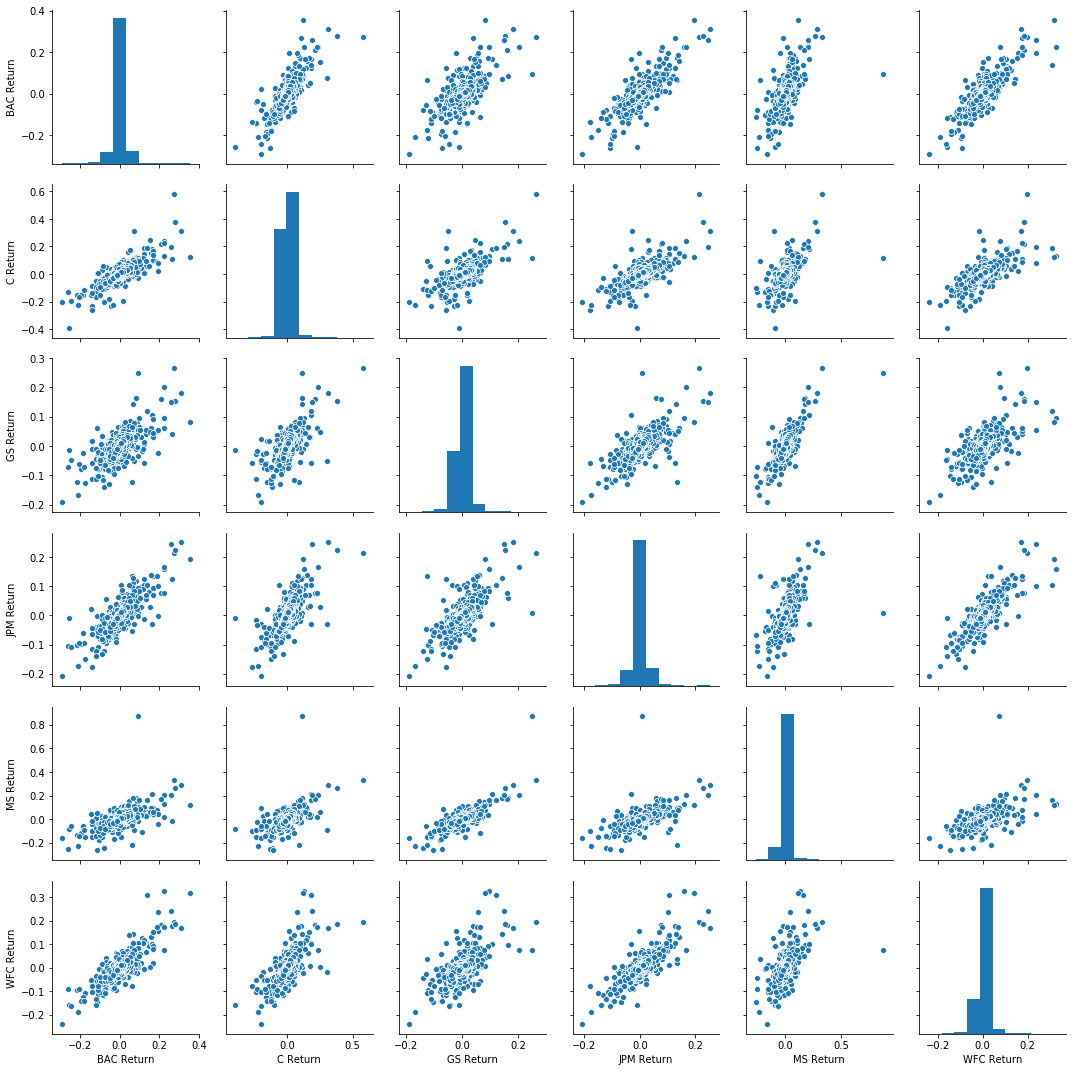

In [14]:
import seaborn as sns
sns.pairplot(returns[1:])

**Using this returns DataFrame, we figure out on what dates each bank stock had the best and worst single day returns:**

In [15]:
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [16]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [17]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

We notice that 4 of the banks share the same day for the worst drop. Interestingly, this is the day of Barack Obama's inauguration.
 
 We also notice that Citigroup's largest drop and biggest gain were very close to one another, significantly, [Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may))
 ___

**Let's take a look at the standard deviation of the returns, which stock would we classify as the riskiest over the entire time period? Which would we classify as the riskiest for the year 2015?**

In [18]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [23]:
# All quite similarly low risk profiles during 2015, but highest Morgan Stanley
returns.loc["2015-01-01":"2015-12-31"].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Distribution plot of the 2015 returns for Morgan Stanley using seaborn:**

C:\Users\Justin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


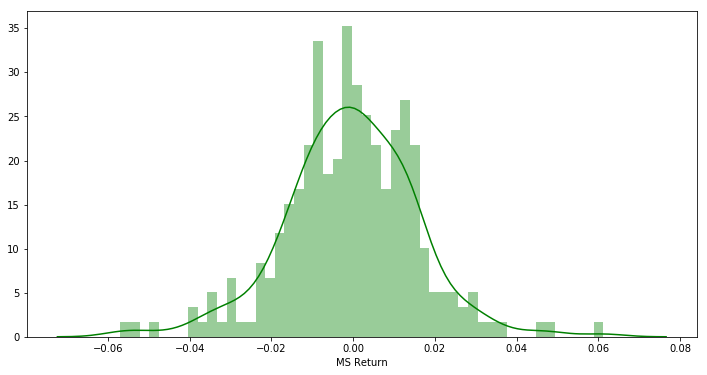

In [29]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc["2015-01-01":"2015-12-31"]["MS Return"],color="green",bins=50)

Notice the low distribution ranging roughly between -0.06 and 0.06

**Distribution plot of the 2008 returns for CitiGroup using seaborn:**

C:\Users\Justin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


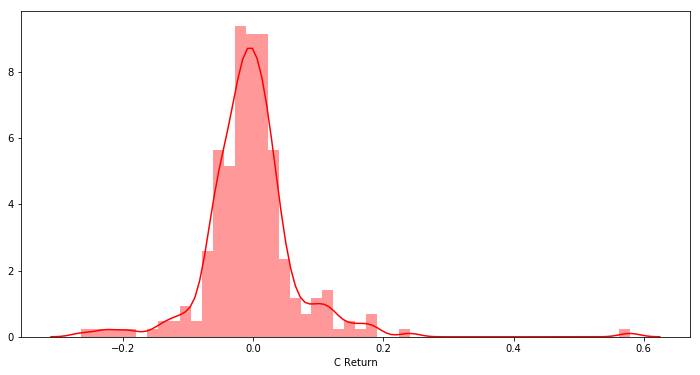

In [30]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc["2008-01-01":"2008-12-31"]["C Return"],color="red",bins=50)

Notice the up to 10 times greater distribution, of up to 0.6 (compared to 0.06)

____
# More Visualisation

This section will focus on visualisation libraries. We use seaborn, matplotlib, plotly and cufflinks, as well as pandas' built-in visualisation functionality.

### Imports

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time:**

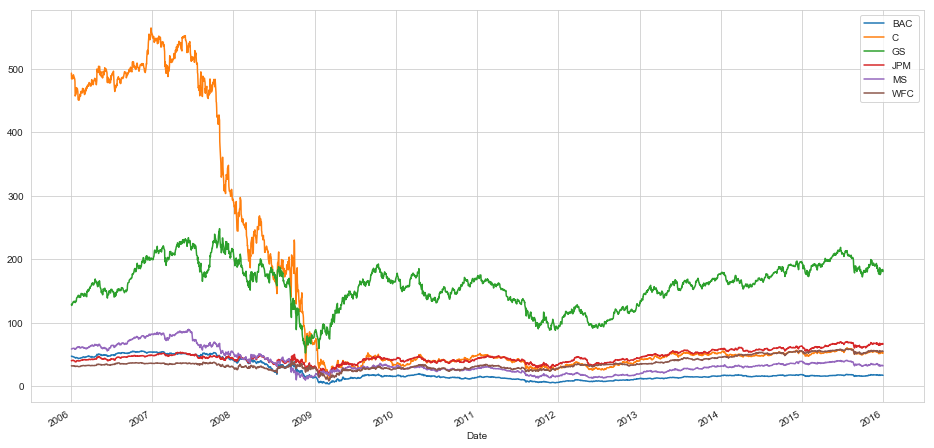

In [34]:
# Using a for loop and pandas' functionality
for tick in tickers:
    bank_stocks[tick]["Close"].plot(label=tick,figsize=(16,8))
plt.legend()

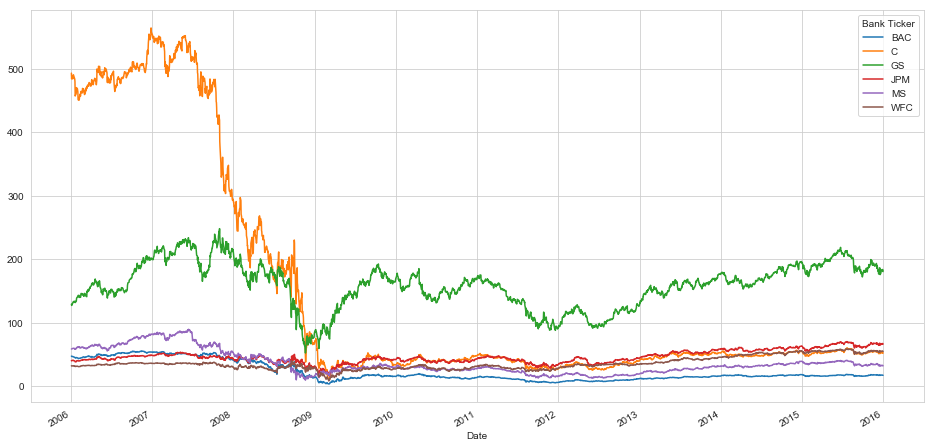

In [35]:
# Utilising .xs cross-section functionality to manipulate the data
bank_stocks.xs(key="Close",axis=1,level="Stock Info").plot(figsize=(16,8))

In [38]:
# Using plotly and cufflinks to create an interactive graph
bank_stocks.xs(key="Close",axis=1,level="Stock Info").iplot()

## Moving Averages

Let's analyse the moving averages for these stocks in the year 2008. 

**We plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008:**

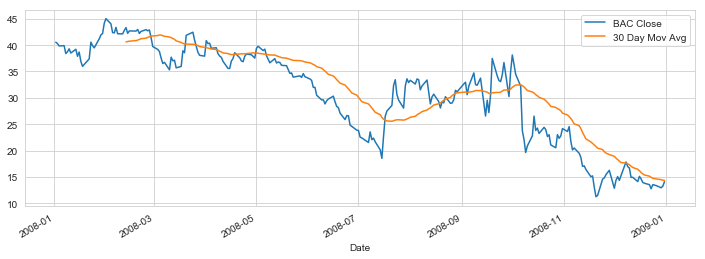

In [39]:
plt.figure(figsize=(12,4))

BAC["Close"].loc["2008-01-01":"2009-01-01"].plot(label="BAC Close")
BAC["Close"].loc["2008-01-01":"2009-01-01"].rolling(window=30).mean().plot(label="30 Day Mov Avg")
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price:**

In [40]:
# Build out dataframe first
hmap = bank_stocks.xs(key="Close",axis=1,level="Stock Info").corr()

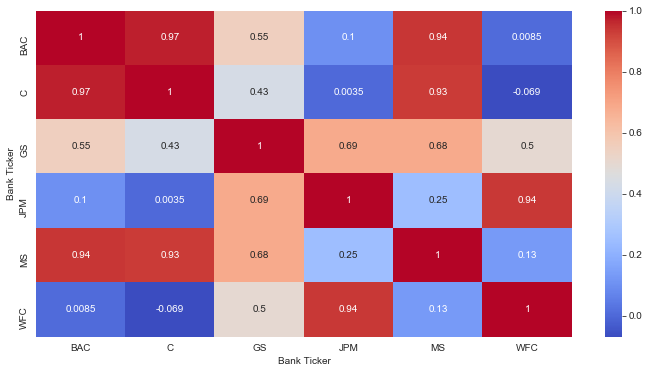

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(hmap, annot=True,cmap="coolwarm")

**Using seaborn's clustermap to cluster the correlations together:**

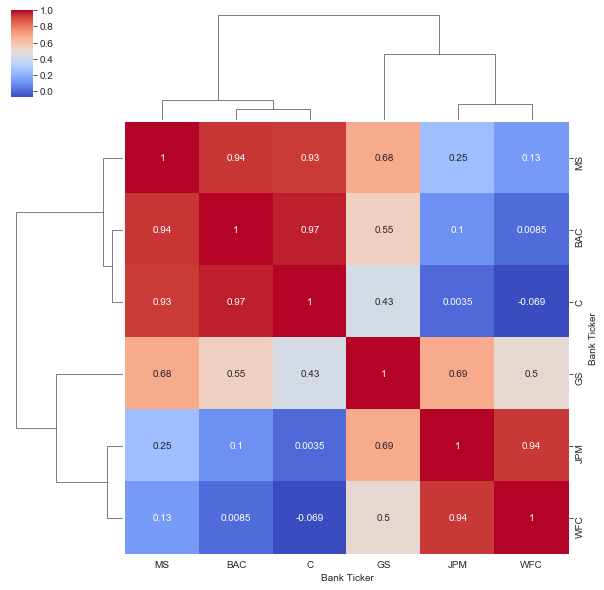

In [43]:
sns.clustermap(hmap, annot=True,cmap="coolwarm")

**Using plotly to create an interactive heatmap:**|

In [44]:
hmap.iplot(kind="heatmap",colorscale="rdylbu")

# 

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

**Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016:**

In [46]:
bac15 = BAC[["Open", "High", "Low", "Close"]].loc["2015-01-01":"2016-01-01"]
bac15.iplot(kind="candle")

**Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015:**

In [47]:
MS["Close"].loc["2015-01-01":"2016-01-01"].ta_plot(study="sma",periods=[13,21,55])

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015:**

In [48]:
BAC["Close"].loc["2015-01-01":"2016-01-01"].ta_plot(study="boll")

# Thanks For Reading!